# Detecting Fraud on Ethereum

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import data from data/transactions.csv
transactions_df = pd.read_csv('data/transactions.csv')

# show summary statistics
transactions_df.describe()

,nonce,block_number,transaction_index,gas,gas_price,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,max_fee_per_blob_gas,blob_versioned_hashes
count,139255.000000,139255.000000,139255.000000,1.392550e+05,1.392550e+05,1.392550e+05,0.0,0.0,139255.0,0.0,0.0
mean,5754.232875,177011.407253,17.611784,7.571893e+04,8.028699e+10,1.441205e+09,NaN,NaN,0.0,NaN,NaN
std,7514.660700,36888.037772,31.373293,2.242644e+05,4.544315e+11,6.933802e+05,NaN,NaN,0.0,NaN,NaN
min,0.000000,100004.000000,0.000000,2.100000e+04,4.500000e+10,1.439799e+09,NaN,NaN,0.0,NaN,NaN
25%,29.000000,148528.000000,0.000000,2.100000e+04,5.000000e+10,1.440635e+09,NaN,NaN,0.0,NaN,NaN
50%,1237.000000,178829.000000,2.000000,2.500000e+04,5.000000e+10,1.441263e+09,NaN,NaN,0.0,NaN,NaN
75%,10929.000000,207847.000000,18.000000,9.000000e+04,5.466458e+10,1.441799e+09,NaN,NaN,0.0,NaN,NaN
max,27670.000000,238199.000000,148.000000,3.141592e+06,1.000000e+13,1.442326e+09,NaN,NaN,0.0,NaN,NaN


In [2]:
# create a copy of the df to explore and manipulate #
df = transactions_df.copy()

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139255 entries, 0 to 139254
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   hash                      139255 non-null  object 
 1   nonce                     139255 non-null  int64  
 2   block_hash                139255 non-null  object 
 3   block_number              139255 non-null  int64  
 4   transaction_index         139255 non-null  int64  
 5   from_address              139255 non-null  object 
 6   to_address                138322 non-null  object 
 7   value                     139255 non-null  object 
 8   gas                       139255 non-null  int64  
 9   gas_price                 139255 non-null  int64  
 10  input                     139255 non-null  object 
 11  block_timestamp           139255 non-null  int64  
 12  max_fee_per_gas           0 non-null       float64
 13  max_priority_fee_per_gas  0 non-null       f

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,max_fee_per_blob_gas,blob_versioned_hashes
0,0xd133956b0ddcd58f30fcc60ed18d6f175b03b342b203...,164,0x9493fb89a5bd30ca0c49f9d821715b7eec06d6007aa1...,100405,0,0x007f7f58d3eb5b7510a301ecc749fc1fcddbe14d,0xb1abce2918e21ddb93aa452731a12672a3d9f75a,5000000000000000000,90000,60347544134,0x,1439806029,NaN,NaN,0,NaN,NaN
1,0x174b4f8118e1429581e9d8154c204f3c6d355b059971...,11,0x3c6e938bc68872a0f3b12a6226ba3da21fecd81a17c6...,100408,0,0xcd1e66ed539dd92fc40bbaa1fa16de8c02c14d45,0xe0e82ed3e93079ce76aac1da7b4bfa990d885a0d,174420874796219315407,21000,55854227910,0x,1439806081,NaN,NaN,0,NaN,NaN
2,0xba2f997aa470c83fbccf71f8f8d59dc972a4cd39e70c...,15,0x44e25aa76eb0a02fb369c20a08553b34121c2e842398...,100409,0,0x0a319a7e0c887f104359e1eee6717bd8f232d3da,0x32be343b94f860124dc4fee278fdcbd38c102d88,1780494800000000000,21000,59043039037,0x,1439806096,NaN,NaN,0,NaN,NaN
3,0x82776456a7f8d881eb28a29d4e4f898028742906e30f...,6,0x44e25aa76eb0a02fb369c20a08553b34121c2e842398...,100409,1,0x3b399ff2b96f27056ab8a7f6e028b0dbaf386279,0x32be343b94f860124dc4fee278fdcbd38c102d88,29277820729999998976,21000,59043039037,0x,1439806096,NaN,NaN,0,NaN,NaN
4,0xce9894a6cd506133f98c23781a2228c27ae1edc41648...,29,0x44e25aa76eb0a02fb369c20a08553b34121c2e842398...,100409,2,0xcf00a85f3826941e7a25bfcf9aac575d40410852,0xd9666150a9da92d9108198a4072970805a8b3428,5000000000000000000,90000,54588778004,0x,1439806096,NaN,NaN,0,NaN,NaN


In [3]:
# max_fee_per_gas & max_priority_fee_per_gas have no non null entries, this feature was added in the London Hardfork (Aug 2021) upgrade
# dropping these columns is ok
london_hardfork_columns = df[['max_fee_per_gas', 'max_priority_fee_per_gas']].isna().value_counts()
print(f"Number of entries with null max_fee_per_gas or max_priority_fee_per_gas: {london_hardfork_columns.sum()}")
df = df.drop(columns=['max_fee_per_gas', 'max_priority_fee_per_gas'])

# max_fee_per_blob_gas & blob_versioned_hashes have no non null entries, this feature will be added in the Proto-Danksharding upgrade
# dropping these columns is ok
danksharding_columns = df[['max_fee_per_blob_gas', 'blob_versioned_hashes']].isna().value_counts()
print(f"Number of entries with null max_fee_per_blob_gas or blob_versioned_hashes: {danksharding_columns.sum()}")
df = df.drop(columns=['max_fee_per_blob_gas', 'blob_versioned_hashes'])

Number of entries with null max_fee_per_gas or max_priority_fee_per_gas: 139255
Number of entries with null max_fee_per_blob_gas or blob_versioned_hashes: 139255


In [4]:
## UPDATED DATASET HAS NO MISSING VALUES FOR TO_ADDRESS AND FROM ADDRESS

# exploration of columns with null/missing values:

# to_address is missing 5/500 values, receipt_contract_address is missing 495/500
# exploration to see if this indicates directionality of the transaction

# null_to_address = df[df['to_address'].isnull()].index.tolist()
# null_receipt_address = df[df['from_address'].isnull()].index.tolist()
# print(f"Entries missing to_address: {null_to_address}")

# print("Entries missing both to_address and from_address:" + str([x for x in null_receipt_address if x in null_to_address]) + '\n')
# for idx in null_to_address:
#     receipt_address = df['from_address'].iloc[idx]
#     print(f"Receipt contract address for entry missing to_address: {receipt_address}")

# print("Number of missing receipt addresses: " + str(len(null_receipt_address)))
# print("Entries missing a to_address have a from_address, entries missing a receipt_contract_address have a to_address, these features are mutually exclusive.")

In [5]:
# Consider usable formats for features #

# Hash is a string used to identify transactions - can use index instead (?)

# what is nonce? what can this tell us about each transaction?

# BD: it's a unique number that tracks the number of transactions sent from a given address. 
# Each Ethereum account has a nonce value that increases with each transaction the account sends

# the max nonce value below shows that at least one account has sent 27671 transactions in the dataset

# HR: A question we may wish to address is whether accounts with smaller nonce are more/less likely to experience fraud? Intuition would have me think
# that accounts that make lots of transaction are "safe" - or on the flip side maybe accounts with high nonce over a short period are more likely to be fraudulent

# BD: I think this is a good question. I could buy either theory, but I think the data will show that accounts with high nonce are more likely to be fraudulent.

print(f"Max nonce: {df['nonce'].max()}")
print(f"Min nonce: {df['nonce'].min()}")
print(f"Mean nonce: {df['nonce'].mean()}")
print(f"Number of unique nonce values: {df['nonce'].nunique()}")

# Explore time stamps for frequency of transactions that contrubute to nonce
time_example = df['block_timestamp'][0]
print(f"Timestamp example entry 0: {time_example}")
timestamp_format = pd.to_datetime(time_example, unit='s')
print(f"Using timestamp format from Unix epoch: {timestamp_format}")

# Create new column to see block_timestamp in datetime format:
df['block_timestamp_dt'] = pd.to_datetime(df['block_timestamp'], unit='s')
# Create new columns to record the year, month, day, and time - good for human readability may not be useful for analysis
df['transaction_year'] = df['block_timestamp_dt'].dt.year
df['transaction_month'] = df['block_timestamp_dt'].dt.month
df['transaction_day'] = df['block_timestamp_dt'].dt.day
df['transaction_time'] = df['block_timestamp_dt'].dt.time

print('\n')
print(df['transaction_year'][:5])
print(type(df['transaction_year'][0]))
print(f"Unique transaction years: {df['transaction_year'].nunique()}")
# All transactions are from 2015

print('\n')
print(df['transaction_month'][:5])
print(type(df['transaction_month'][0]))
print(f"Unique transaction months: {df['transaction_month'].nunique()}")

print('\n')
print(df['transaction_day'][:5])
print(type(df['transaction_day'][0]))
print(f"Unique transaction days: {df['transaction_day'].nunique()}")
print('\n')

print(df.info())


Max nonce: 27670
Min nonce: 0
Mean nonce: 5754.232874941654
Number of unique nonce values: 27671
Timestamp example entry 0: 1439806029
Using timestamp format from Unix epoch: 2015-08-17 10:07:09


0    2015
1    2015
2    2015
3    2015
4    2015
Name: transaction_year, dtype: int64
<class 'numpy.int64'>
Unique transaction years: 1


0    8
1    8
2    8
3    8
4    8
Name: transaction_month, dtype: int64
<class 'numpy.int64'>
Unique transaction months: 2


0    17
1    17
2    17
3    17
4    17
Name: transaction_day, dtype: int64
<class 'numpy.int64'>
Unique transaction days: 30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139255 entries, 0 to 139254
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   hash                139255 non-null  object        
 1   nonce               139255 non-null  int64         
 2   block_hash          139255 non-null  object        
 3   block_num

In [6]:
# explore wallets that receive lots of transactions:

print(f"Number of unique to_addresses: {df['to_address'].nunique()}")
print(f"Number of transactions in data set: {df['hash'].nunique()}")
print(f"Frequency of to_addresses: \n{df['to_address'].value_counts()}")

# to_address 0x32be343b94f860124dc4fee278fdcbd38c102d88 has 38797 transactions
counts = df['to_address'].value_counts()
percentiles = counts.quantile([0.25, 0.5, 0.75])
print(f"To address frequency percentiles:\n{percentiles}")


Number of unique to_addresses: 6754
Number of transactions in data set: 139255
Frequency of to_addresses: 
0x32be343b94f860124dc4fee278fdcbd38c102d88    38797
0x7c5080988c6d91d090c23d54740f856c69450b29     7180
0xc47aaa860008be6f65b58c6c6e02a84e666efe31     3292
0x58850ab9442c06379dffbf52e3eaa035f5d5e092     2824
0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98     2597
                                              ...  
0x89e696a97d69f05d78e3ebf78c92092c1cc80e3f        1
0x1706bf774949d89737d0723bee3ef3511ab30dad        1
0x601b2281bde506e33c74a57917e6e2d48476697e        1
0x126cc7c723d495f2f9862746573477901fdff58a        1
0xabd8567b813b501034a36b8053eb4bf0b60e4fce        1
Name: to_address, Length: 6754, dtype: int64
To address frequency percentiles:
0.25     1.0
0.50     2.5
0.75    13.0
Name: to_address, dtype: float64


In [7]:
## Exploring value

# print(df['value'][:5])
print("Counts of transactions for specified values:")
print(df['value'].value_counts())
print(f"Data type of values: {type(df['value'][0])}")
print(f"Max Value: {df['value'].max()}\n")

# Need to convert value to float
df['value'] = df['value'].astype(float)
print(f"Data type of converted values: {type(df['value'][0])}")

# What are the units for value? - values reported in WEI = 1/10^18 Ethereum

# creating value_ether feature
df['value_ether'] = df['value'] / (10 ** 18)
print(f"Max Value of Ether traded: {df['value_ether'].max()}")
print(f"Min Value of Ether traded: {df['value_ether'].min()}")

Counts of transactions for specified values:
0                       3337
1                       1665
1000000000000000000     1121
5000000000000000000     1066
4998950000000000000      587
                        ... 
11198605147200000000       1
1529470188490000000        1
356106298563000000         1
2278417018610000000        1
100215730000000000         1
Name: value, Length: 119223, dtype: int64
Data type of values: <class 'str'>
Max Value: 99999999999999991611392

Data type of converted values: <class 'numpy.float64'>
Max Value of Ether traded: 935800.0
Min Value of Ether traded: 0.0


In [8]:
## Exploring input

print(df['input'][:10])
print(df['input'].value_counts())
# print([x for x in df['input'] if x != '0x'])

# Drop input feature 
df = df.drop('input', axis=1)


0                      0x
1                      0x
2                      0x
3                      0x
4                      0x
5                      0x
6                      0x
7    0x454e47583939505930
8                      0x
9                      0x
Name: input, dtype: object
0x                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [9]:
# Exploring transaction type
print(df['transaction_type'][:5])
print(f"Number of unique transaction types: {df['transaction_year'].nunique()}")
print(df['transaction_type'].value_counts())

# only one type of transaction in dataset

0    0
1    0
2    0
3    0
4    0
Name: transaction_type, dtype: int64
Number of unique transaction types: 1
0    139255
Name: transaction_type, dtype: int64


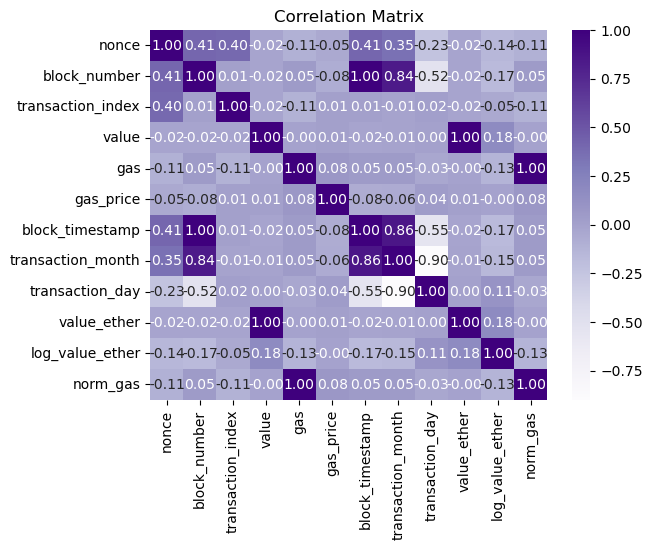

In [31]:
# Exploring feature correlations

# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# If needed, drop any specific columns (like 'transaction_year', 'transaction_type') from the correlation matrix
columns_to_exclude = ['transaction_year', 'transaction_type']
numeric_df = numeric_df.drop(columns=columns_to_exclude, errors='ignore')

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix heatmap
sns.heatmap(corr_matrix, cmap='Purples', annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

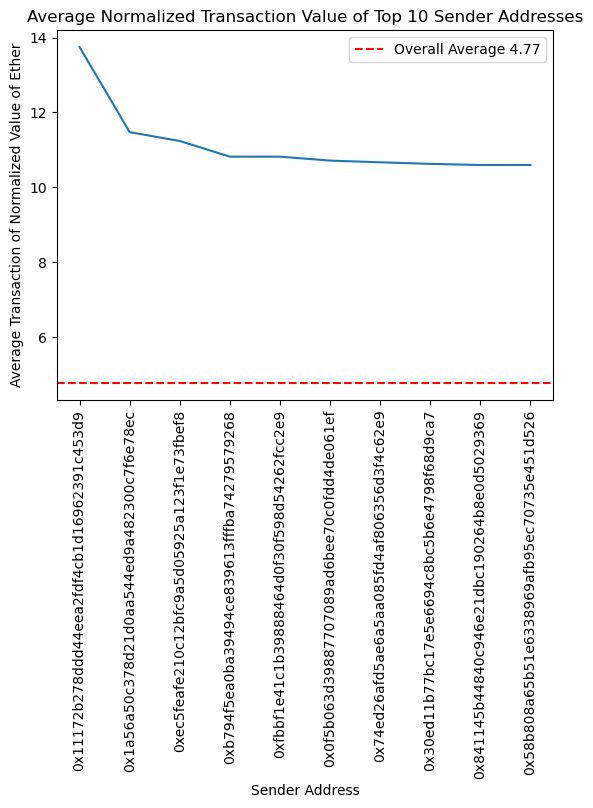

In [32]:
# Find the 10 senders with the highest average transaction value

senders = df.groupby('from_address')['value_ether'].mean().reset_index()
senders.columns = ['from_address', 'average_value_ether']
senders['log_av_value_ether'] = np.log1p(senders['average_value_ether'])
top_10_addresses = senders.sort_values(by='log_av_value_ether', ascending=False).head(10)

av_value = df['value_ether'].mean()
log_av_value = np.log1p(av_value)

plt.plot(top_10_addresses['from_address'], top_10_addresses['log_av_value_ether'])
plt.axhline(y=log_av_value, color='r', linestyle='--', label=f'Overall Average {log_av_value:.2f}')
plt.xlabel("Sender Address")
plt.ylabel("Average Transaction of Normalized Value of Ether")
plt.title("Average Normalized Transaction Value of Top 10 Sender Addresses")
plt.xticks(rotation=90)
plt.legend()
plt.show()

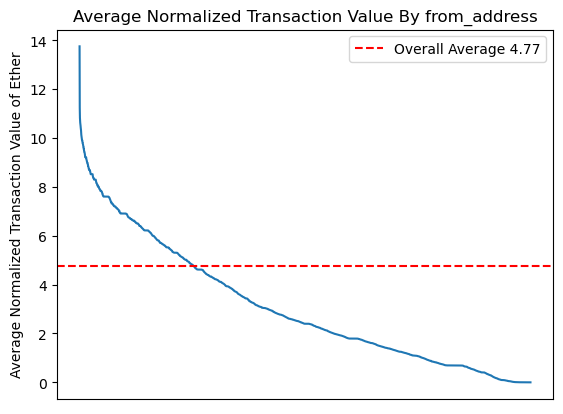

In [33]:
all_addresses = senders.sort_values(by='log_av_value_ether', ascending=False)

plt.plot(all_addresses['from_address'], all_addresses['log_av_value_ether'])
plt.axhline(y=log_av_value, color='r', linestyle='--', label=f'Overall Average {log_av_value:.2f}')
plt.ylabel("Average Normalized Transaction Value of Ether")
plt.title("Average Normalized Transaction Value By from_address")
plt.xticks([])
plt.legend()
plt.show()

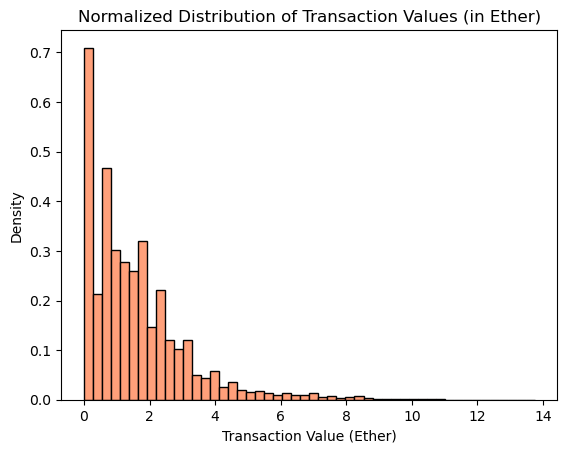

In [34]:
# Log normalization to reduce range impact
df['log_value_ether'] = np.log1p(df['value_ether'])

# Plot normalized distribution
df['log_value_ether'].plot(kind='hist', bins=50, density=True, color='LightSalmon', linewidth=1, edgecolor='black', title='Normalized Distribution of Transaction Values (in Ether)')
plt.xlabel('Transaction Value (Ether)')
plt.ylabel('Density')
plt.show()

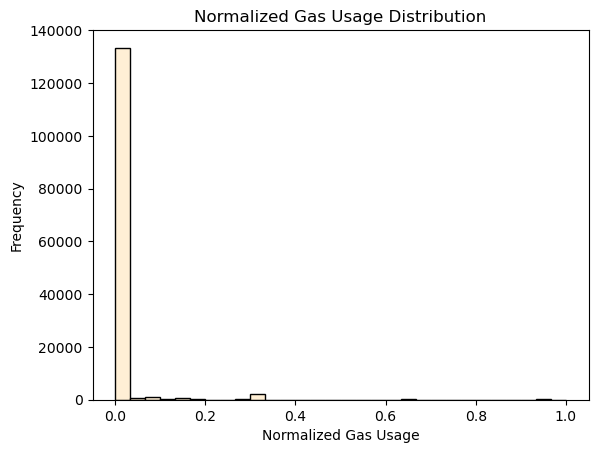

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['norm_gas'] = scaler.fit_transform(df[['gas']])

# Plot normalized gas usage
df['norm_gas'].plot(kind='hist', bins=30, color='PapayaWhip', linewidth=1, edgecolor='black', title='Normalized Gas Usage Distribution')
plt.xlabel('Normalized Gas Usage')
plt.show()

In [36]:
df['log_gas_price_gwei'] = np.log1p(df['gas_price_gwei'])

# Plot normalized gas prices
df['log_gas_price_gwei'].plot(kind='hist', bins=40, color='SlateBlue', linewidth=1, edgecolor='black', title='Log-Normalized Distribution of Gas Prices (in Gwei)')
plt.xlabel('Log Gas Price (Gwei)')
plt.show()


KeyError: 'gas_price_gwei'

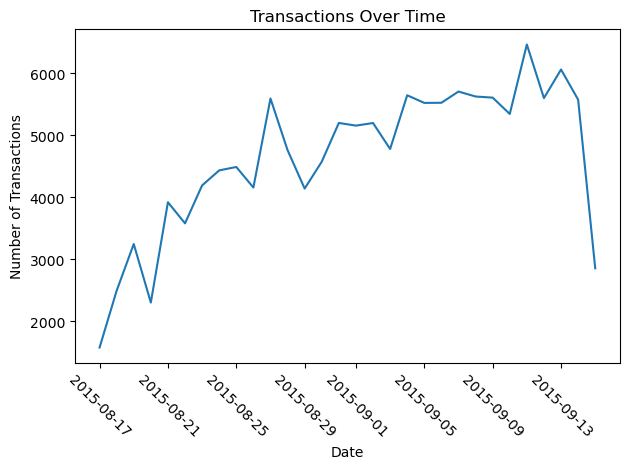

In [37]:
# Convert timestamp to datetime for better readability
df['datetime'] = pd.to_datetime(df['block_timestamp'], unit='s')

# Group by date and count transactions per day
transactions_per_day = df.groupby(df['datetime'].dt.date).size()

# Plot transactions over time with diagonal date labels
transactions_per_day.plot(title='Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=-45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()       # Adjust layout to prevent clipping
plt.show()

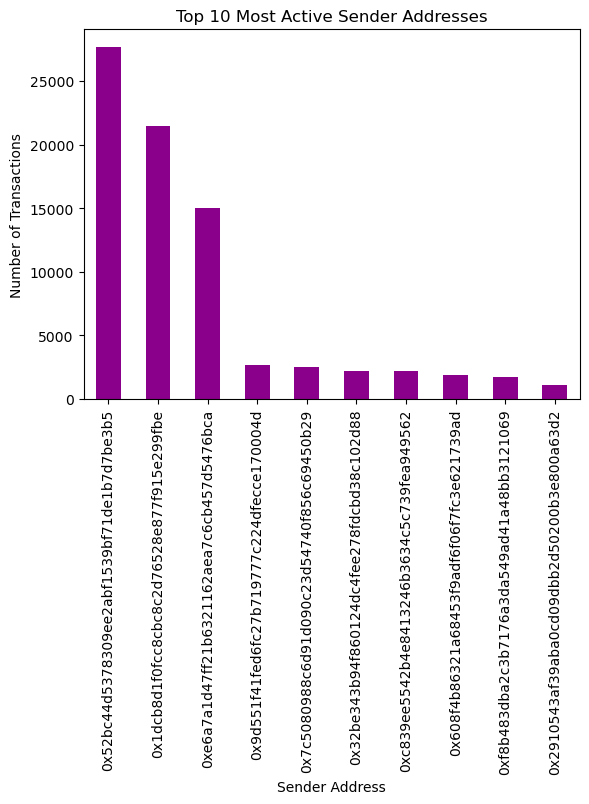

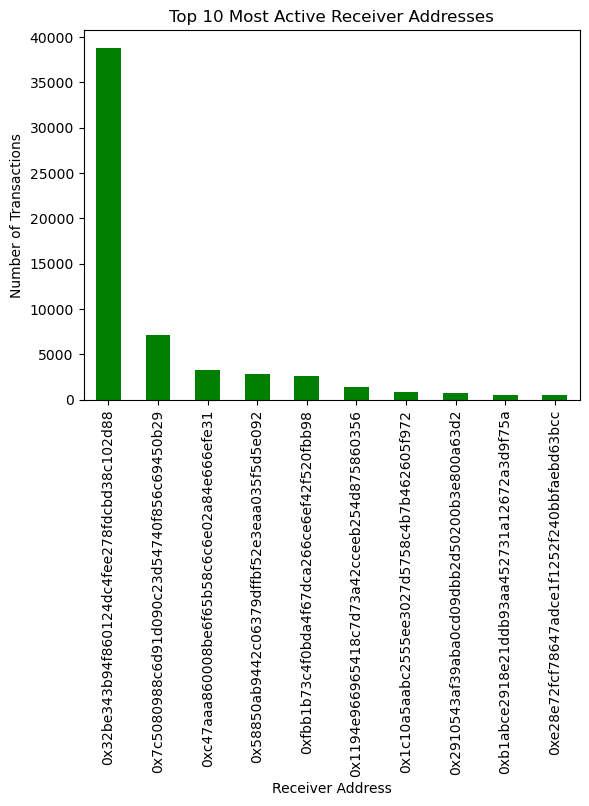

In [38]:
# Most active sender addresses
top_senders = df['from_address'].value_counts().head(10)
top_senders.plot(kind='bar', color='DarkMagenta', title='Top 10 Most Active Sender Addresses')
plt.xlabel('Sender Address')
plt.ylabel('Number of Transactions')
plt.show()

# Most active receiver addresses
top_receivers = df['to_address'].value_counts().head(10)
top_receivers.plot(kind='bar', color='green', title='Top 10 Most Active Receiver Addresses')
plt.xlabel('Receiver Address')
plt.ylabel('Number of Transactions')
plt.show()

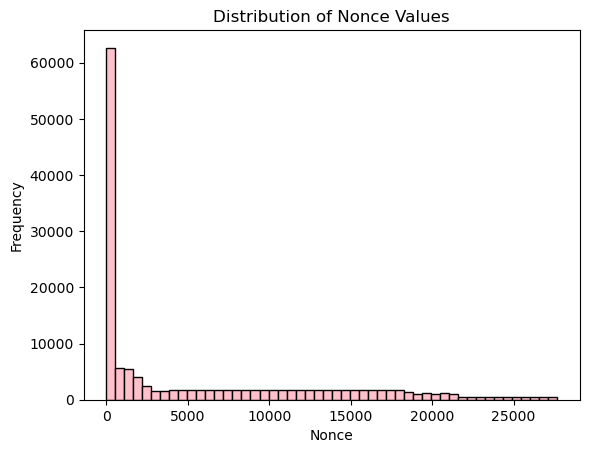

In [39]:
df['nonce'].plot(kind='hist', bins=50, color='pink', linewidth=1, edgecolor='black', title='Distribution of Nonce Values')
plt.xlabel('Nonce')
plt.show()


In [40]:
unique_from_addresses = df['from_address'].nunique()
unique_to_addresses = df['to_address'].nunique()
print(f"Unique from_addresses: {unique_from_addresses}")
print(f"Unique to_addresses: {unique_to_addresses}")

Unique from_addresses: 4942
Unique to_addresses: 6754
